## Prediksi Harga Mobil Ford & Mercedes
### Destyan Yoga A
### 22.12.2445

### Import Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate

### Eksplorasi Data

In [ ]:
# Mengatur gaya estetika plot
sns.set()

# Muat dataset
df = pd.read_csv('/content/drive/MyDrive/CSV/used_car_ford_mercedes.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [ ]:
# Menampilkan informasi dasar tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [ ]:
# Ringkasan Statistik
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [ ]:
# Pemeriksaan Nilai yang Hilang
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


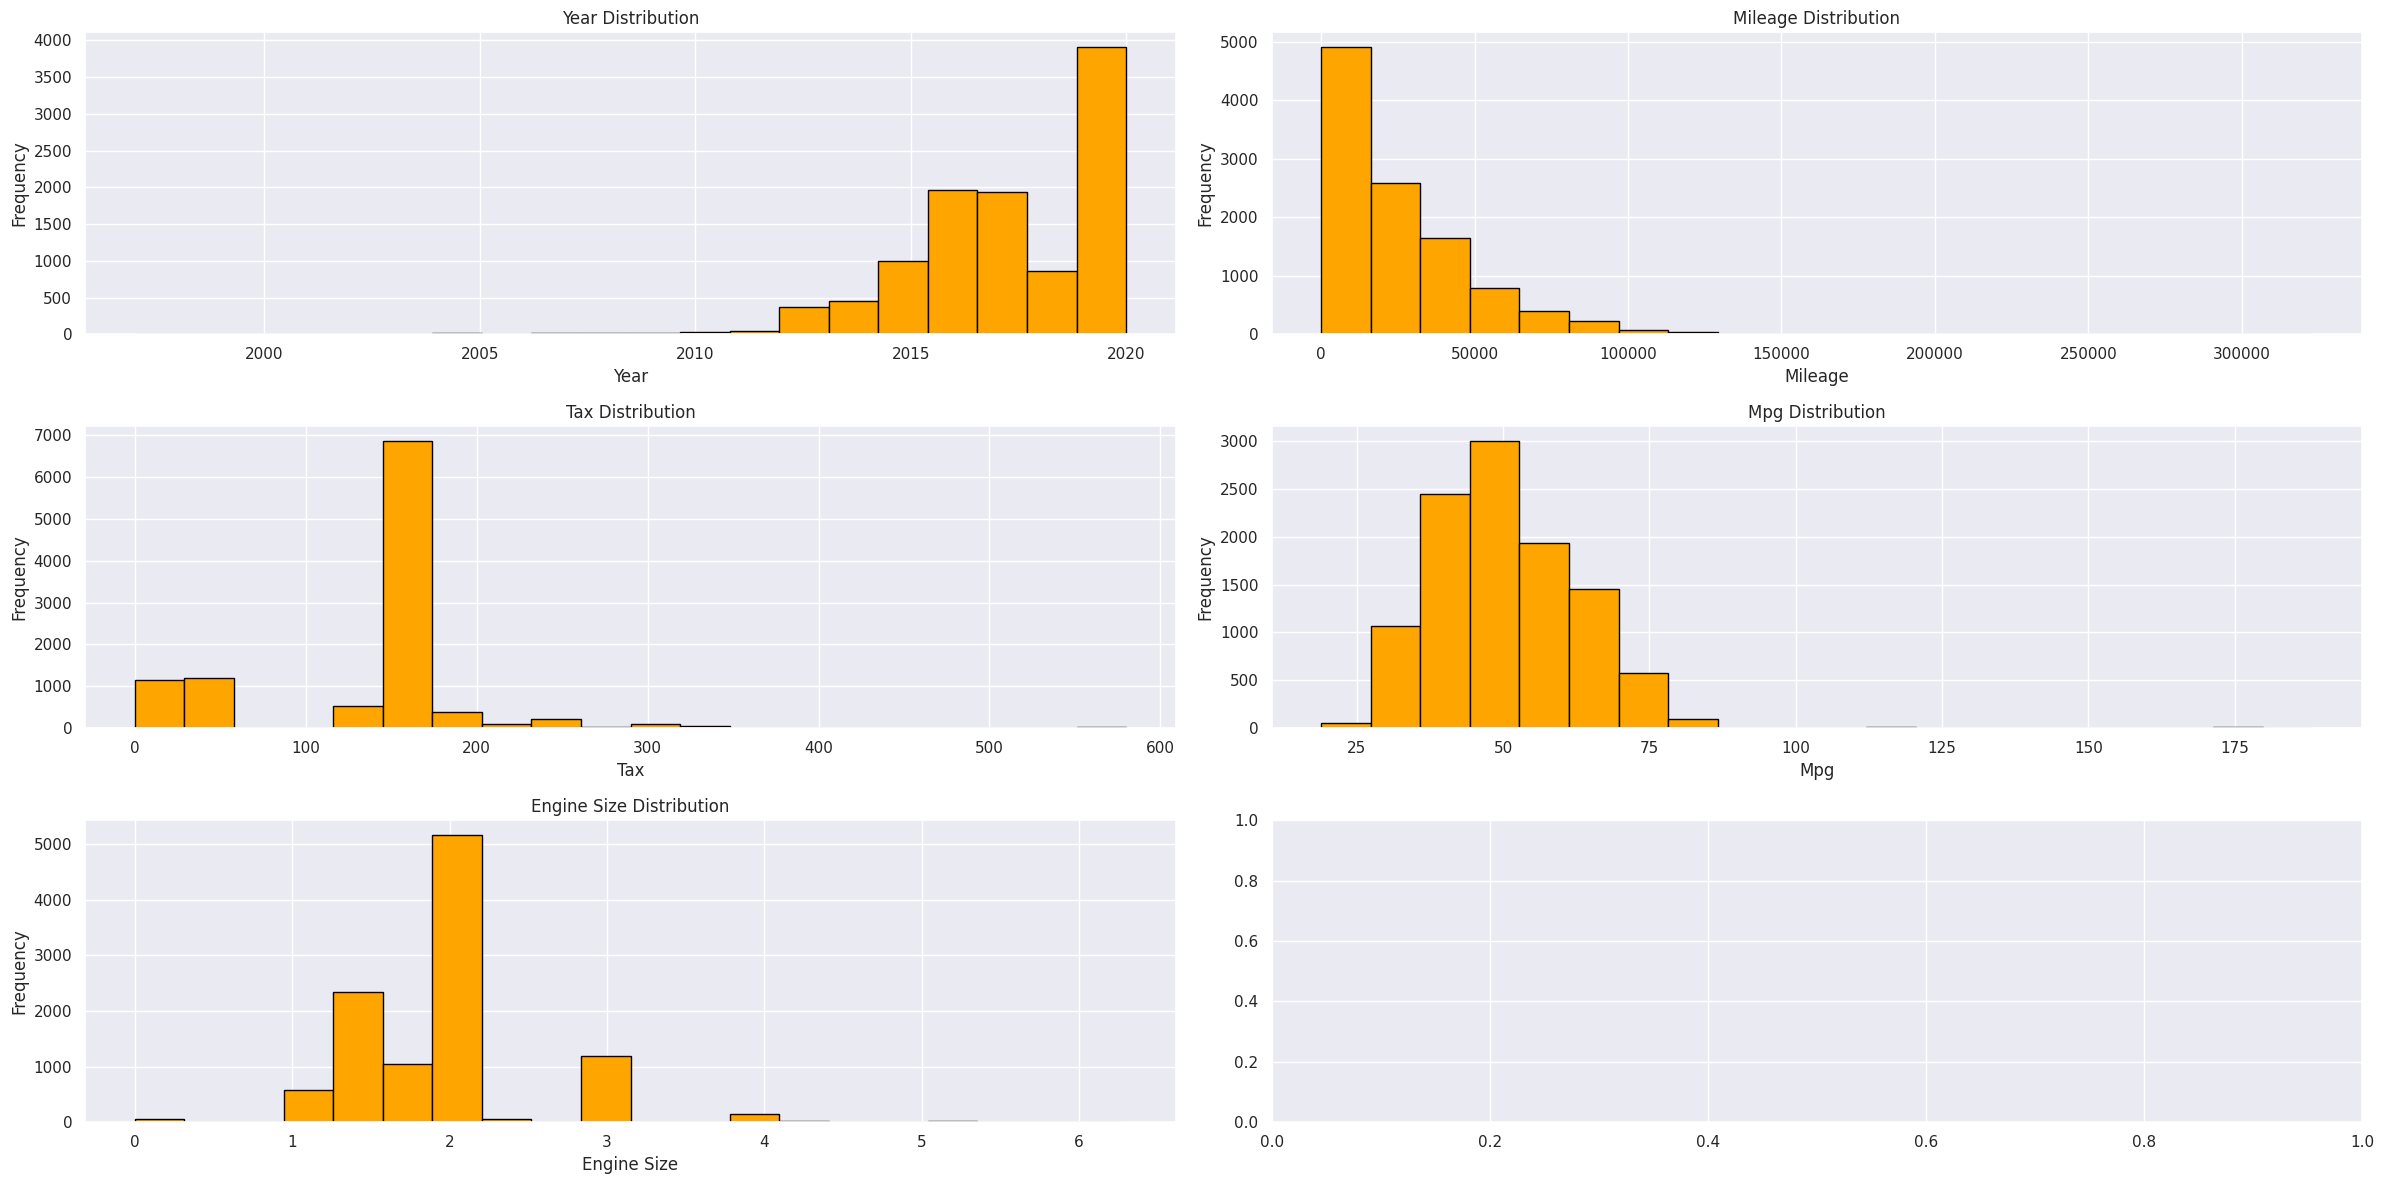

In [ ]:
# Distribusi Fitur Numerik
fig, ax = plt.subplots(3, 2, figsize=(24, 12))

df['year'].hist(ax=ax[0, 0], bins=20, edgecolor='black', color='orange')
ax[0, 0].set_title('Year Distribution')
ax[0, 0].set_xlabel('Year')
ax[0, 0].set_ylabel('Frequency')

df['mileage'].hist(ax=ax[0, 1], bins=20, edgecolor='black', color='orange')
ax[0, 1].set_title('Mileage Distribution')
ax[0, 1].set_xlabel('Mileage')
ax[0, 1].set_ylabel('Frequency')

df['tax'].hist(ax=ax[1, 0], bins=20, edgecolor='black', color='orange')
ax[1, 0].set_title('Tax Distribution')
ax[1, 0].set_xlabel('Tax')
ax[1, 0].set_ylabel('Frequency')

df['mpg'].hist(ax=ax[1, 1], bins=20, edgecolor='black', color='orange')
ax[1, 1].set_title('Mpg Distribution')
ax[1, 1].set_xlabel('Mpg')
ax[1, 1].set_ylabel('Frequency')

df['engineSize'].hist(ax=ax[2, 0], bins=20, edgecolor='black', color='orange')
ax[2, 0].set_title('Engine Size Distribution')
ax[2, 0].set_xlabel('Engine Size')
ax[2, 0].set_ylabel('Frequency')

plt.tight_layout()

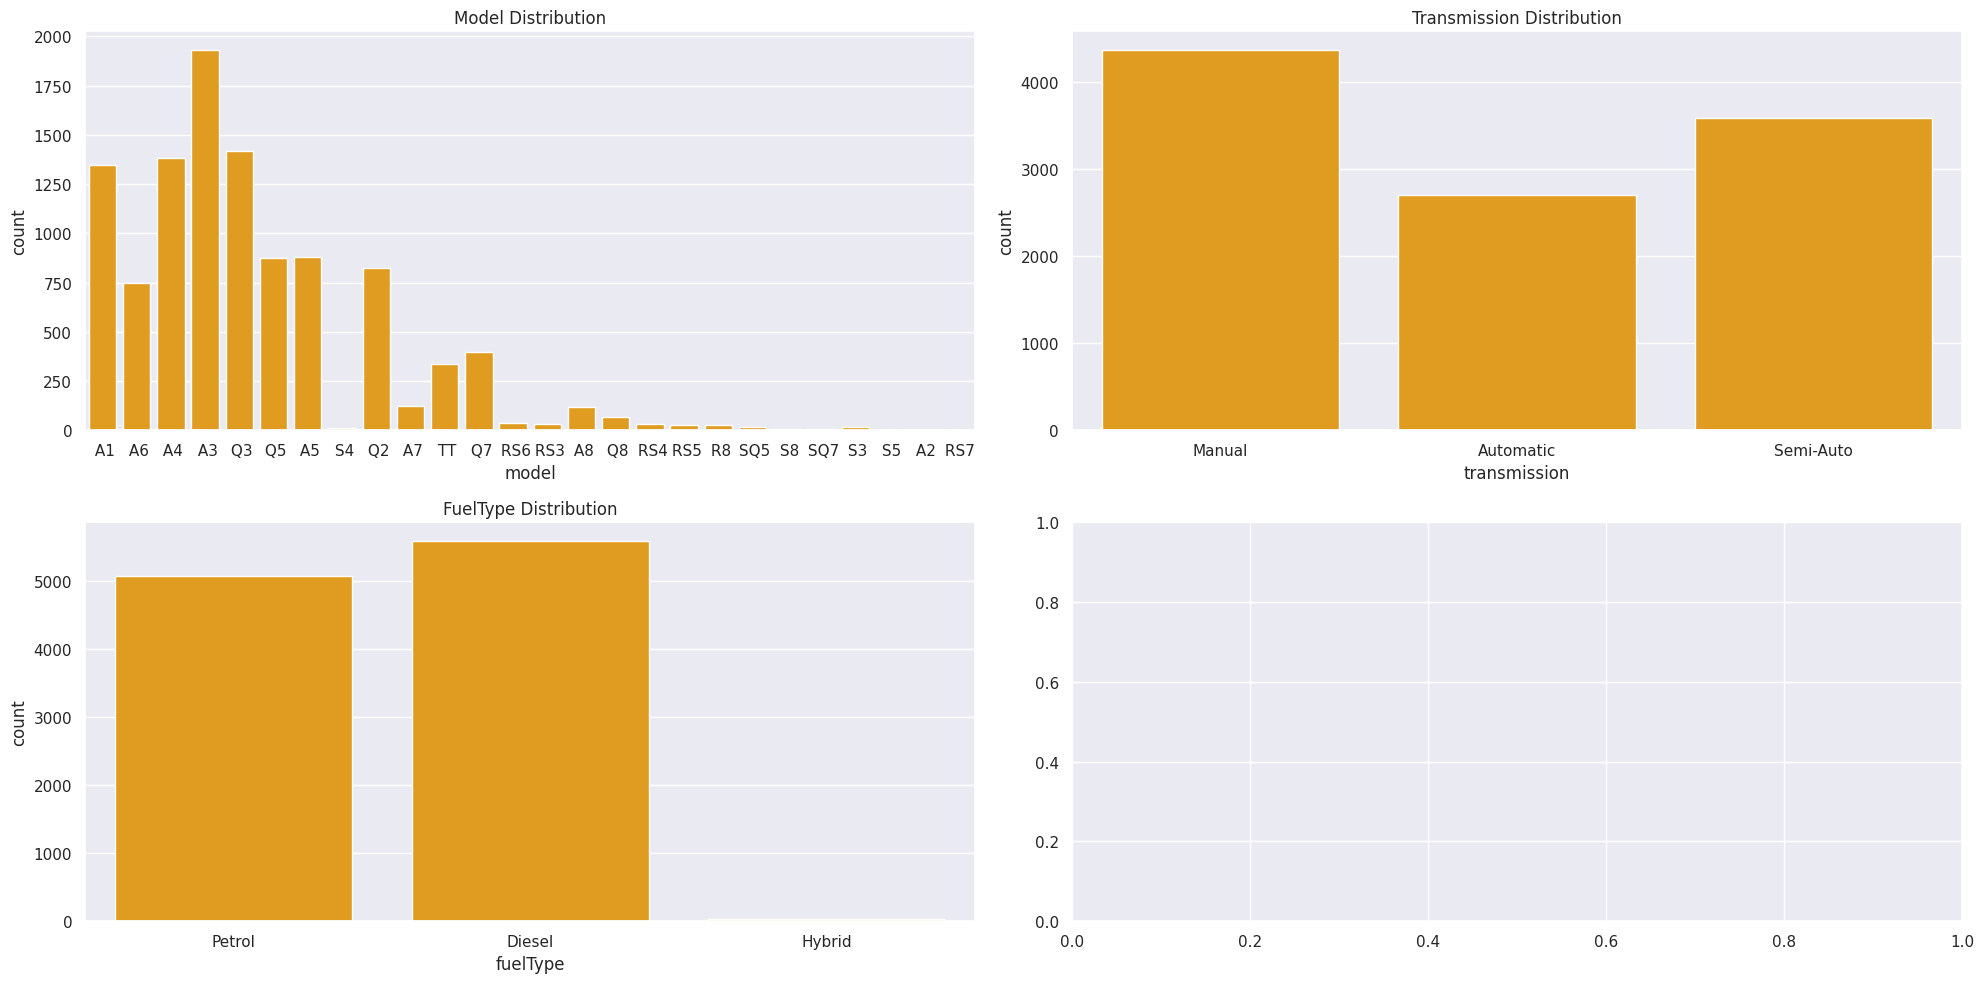

In [ ]:
# Distribusi Fitur Kategorikal
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(x='model', data=df, ax=ax[0, 0], color='orange')
ax[0, 0].set_title('Model Distribution')

sns.countplot(x='transmission', data=df, ax=ax[0, 1], color='orange')
ax[0, 1].set_title('Transmission Distribution')

sns.countplot(x='fuelType', data=df, ax=ax[1, 0], color='orange')
ax[1, 0].set_title('FuelType Distribution')

plt.tight_layout()

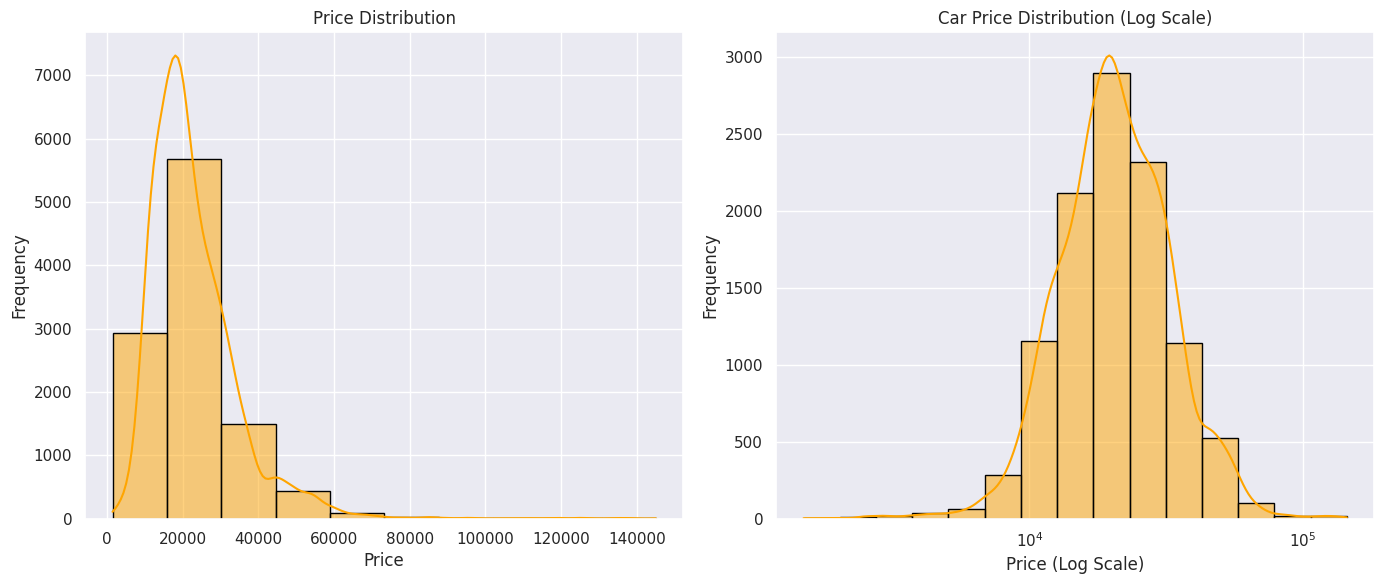

In [ ]:
#Distribusi Harga
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], bins=10, kde=True, color='orange', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['price'], bins=15, kde=True, color='orange', edgecolor='black', log_scale=True)
plt.title('Car Price Distribution (Log Scale)')
plt.xlabel('Price (Log Scale)')
plt.ylabel('Frequency')

plt.tight_layout()

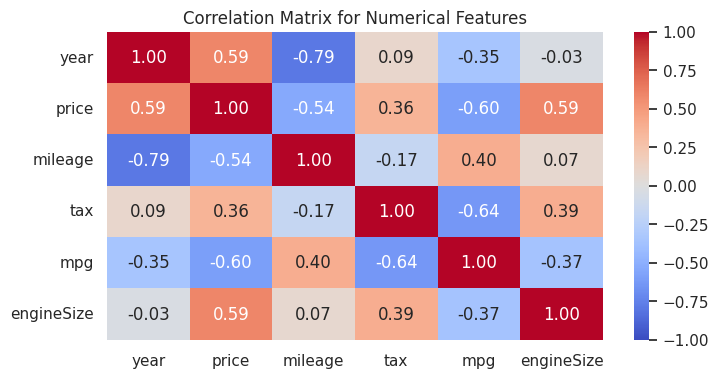

In [ ]:
# Analisis Korelasi
# Menghitung matriks korelasi untuk fitur numerik
numerical_data = df[['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']]
correlation_matrix = numerical_data.corr()

# Membuat heatmap untuk matriks korelasi
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.show()

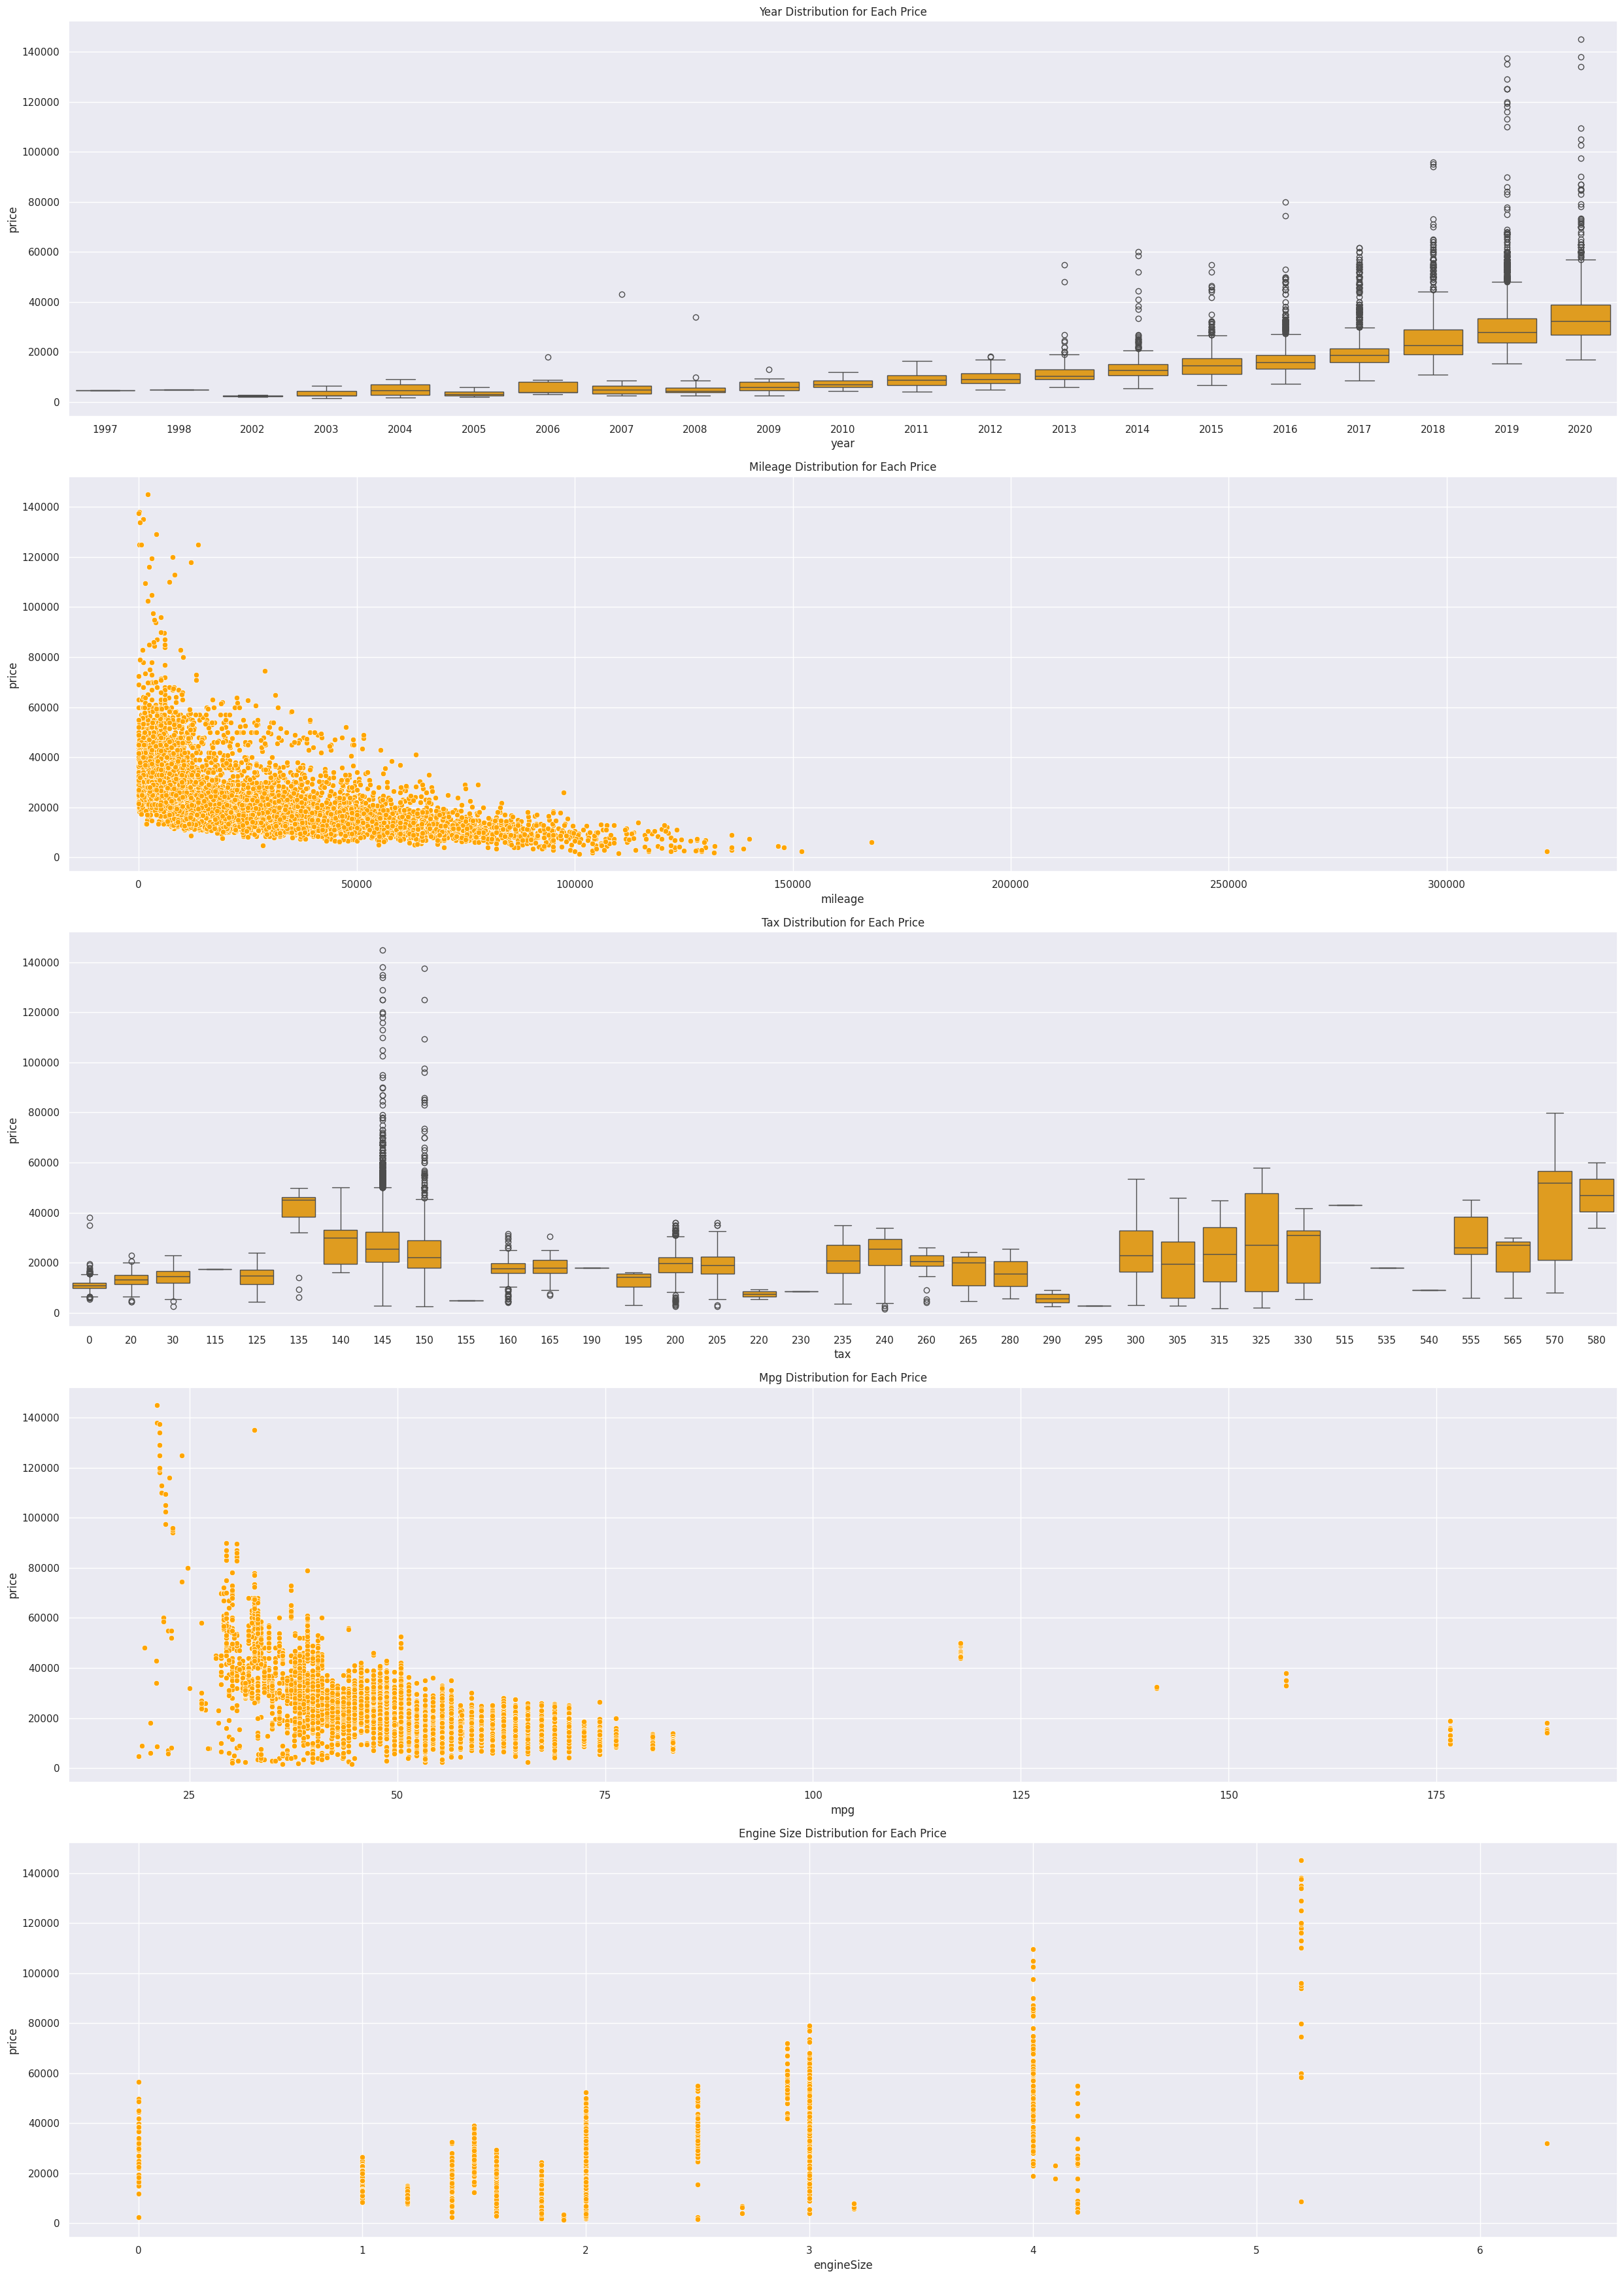

In [ ]:
# Analisis Fitur vs Target
fig, ax = plt.subplots(5, 1, figsize=(25, 35))

## Boxplot untuk Tahun vs Harga
sns.boxplot(x='year', y='price', data=df, ax=ax[0], color='orange')
ax[0].set_title('Year Distribution for Each Price')

## scatterplot untuk Jarak Tempuh vs Harga
sns.scatterplot(x='mileage', y='price', data=df, ax=ax[1], color='orange')
ax[1].set_title('Mileage Distribution for Each Price')

## Boxplot untuk Pajak vs Harga
sns.boxplot(x='tax', y='price', data=df, ax=ax[2], color='orange')
ax[2].set_title('Tax Distribution for Each Price')

## scatterplot untuk Mil Pergalon vs Harga
sns.scatterplot(x='mpg', y='price', data=df, ax=ax[3], color='orange')
ax[3].set_title('Mpg Distribution for Each Price')

## scatterplot untuk Ukuran Mesin vs Harga
sns.scatterplot(x='engineSize', y='price', data=df, ax=ax[4], color='orange')
ax[4].set_title('Engine Size Distribution for Each Price')

plt.tight_layout()

### Preprocessing Data

In [ ]:
# Mendefinisikan kumpulan fitur dan variabel target
X = df.drop('price', axis=1)
y = df['price']

# Mengidentifikasi fitur numerik dan kategorikal
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
categorical_features = ['model', 'transmission', 'fuelType']

# Membagi data ke dalam set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mendefinisikan transformator kolom dengan pengkodean satu-panas untuk fitur kategorikal dan penskalaan untuk fitur numerik
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Memasang transformator pada data pelatihan dan mentransformasikan data pelatihan dan data uji
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### Melatih Model

In [ ]:
#Melatih model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_processed, y_train)

RandomForestRegressor()

### Visualisasi

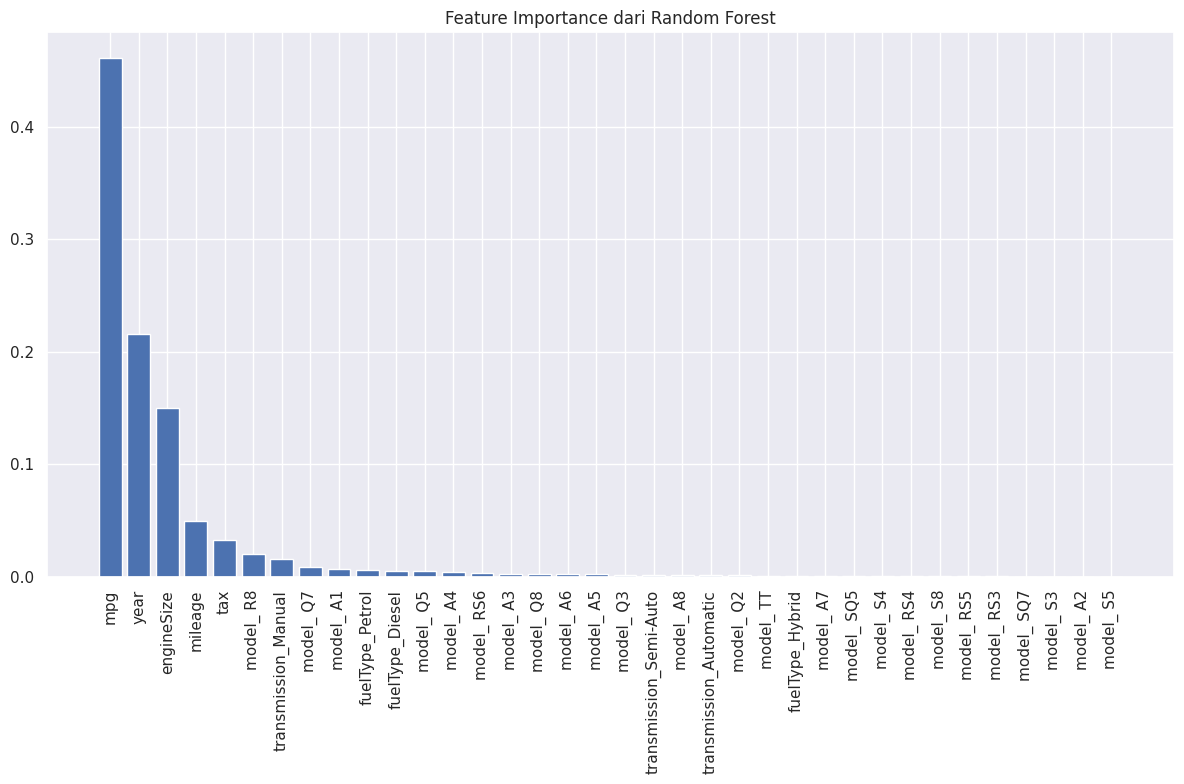

In [ ]:
# Ambil nama fitur setelah preprocessing
# Misalnya pakai preprocessor.named_transformers_ untuk ambil nama
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
categorical_features = ['model', 'transmission', 'fuelType']

# Ambil nama-nama fitur dari OneHotEncoder
onehot_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

# Gabungkan semua nama fitur
all_feature_names = numerical_features + list(onehot_feature_names)

# Ambil feature importances dari model
importances = rf_model.feature_importances_

# Urutkan berdasarkan importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 8))
plt.title("Feature Importance dari Random Forest")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [all_feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

### Pembuatan Model

In [ ]:
# Inisialisasi model regresi
lin_reg = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
svr = SVR()
xgb = XGBRegressor(random_state=42)

# Kamus model regresi
models = {
    'Linear Regression': lin_reg,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Support Vector Regressor': svr,
    'XGBoost': xgb
}

# Kamus untuk menyimpan hasil evaluasi
results = {}

# Melatih dan mengevaluasi setiap model regresi
for model_name, model in models.items():
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {
        'MSE': round(mse, 2),
        'R² Score': round(r2, 4)
    }

# Menampilkan hasil
for model, scores in results.items():
    print(f"{model}:\n  MSE = {scores['MSE']}\n  R² Score = {scores['R² Score']}\n")

Linear Regression:
  MSE = 15710654.77
  R² Score = 0.896

Random Forest:
  MSE = 5225477.55
  R² Score = 0.9654

Gradient Boosting:
  MSE = 7872697.48
  R² Score = 0.9479

Support Vector Regressor:
  MSE = 147668092.48
  R² Score = 0.0229

XGBoost:
  MSE = 5578672.5
  R² Score = 0.9631



### Evaluasi Model

In [ ]:
# Kamus untuk menyimpan metrik evaluasi regresi
model_evaluation_metrics = {}

# Iterasi untuk evaluasi tiap model
for model_name, model in models.items():
    # Prediksi
    y_pred = model.predict(X_test_processed)

    # Hitung metrik regresi
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Simpan ke kamus
    model_evaluation_metrics[model_name] = {
        'MAE': round(mae, 2),
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'R² Score': round(r2, 4)
    }

# Cetak hasil dalam tabel
print(tabulate(
    [(model, *metrics.values()) for model, metrics in model_evaluation_metrics.items()],
    headers=["Model", "MAE", "MSE", "RMSE", "R² Score"],
    tablefmt="grid"
))

+--------------------------+---------+-------------+----------+------------+
| Model                    |     MAE |         MSE |     RMSE |   R² Score |
+==========================+=========+=============+==========+============+
| Linear Regression        | 2633.07 | 1.57107e+07 |  3963.67 |     0.896  |
+--------------------------+---------+-------------+----------+------------+
| Random Forest            | 1521.84 | 5.22548e+06 |  2285.93 |     0.9654 |
+--------------------------+---------+-------------+----------+------------+
| Gradient Boosting        | 1964.79 | 7.8727e+06  |  2805.83 |     0.9479 |
+--------------------------+---------+-------------+----------+------------+
| Support Vector Regressor | 7785.83 | 1.47668e+08 | 12151.9  |     0.0229 |
+--------------------------+---------+-------------+----------+------------+
| XGBoost                  | 1537.93 | 5.57867e+06 |  2361.92 |     0.9631 |
+--------------------------+---------+-------------+----------+------------+

### Simpan Model

In [22]:
from sklearn.pipeline import Pipeline
import pickle
import gzip

# Gabungkan preprocessor + model ke dalam pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# Simpan pipeline ke file
with gzip.open("model_pipeline.pkl.gz", "wb") as f:
    pickle.dump(pipeline, f)